In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error

from pipelines import pipeline_Freeman_mutational_burden
from views import view_linear_model_freeman

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from source import read_preprocessed_data
from transform import combine_tsv_files

In [8]:
# Harmonic mean genomic variable.
X_train_hm, y_train_hm = combine_tsv_files(
    "output/train__harmonic_mean__Allele Fraction.tsv",
    "output/train__harmonic_mean__CNV Score.tsv",
)

In [9]:
best_params_os = {
    "estimator__alpha": 0.5,
    "estimator__l1_ratio": 0.025,
    "transform_columns__age_discretizer__n_bins": 2,
}
elastic_Freeman_mb = pipeline_Freeman_mutational_burden(ElasticNet)
elastic_Freeman_mb.set_params(**best_params_os)

Pipeline(memory=None,
         steps=[('aggregate_point_mutations',
                 AggregateColumns(aggregate_column_name=None,
                                  aggregate_function=None, columns=None)),
                ('category_grouper',
                 MergeRareCategories(categorical_columns=['gender', 'stage',
                                                          'therapyline',
                                                          'smokingstatus',
                                                          'Systemischetherapie',
                                                          'histology_grouped',
                                                          'lymfmeta',
                                                          'brainmeta',
                                                          'adrenalmeta',
                                                          'livermeta',
                                                          'lungmeta',...
               

In [10]:
elastic_Freeman_mb.fit(X_train_hm, y_train_hm['OS_days'])

Pipeline(memory=None,
         steps=[('aggregate_point_mutations',
                 AggregateColumns(aggregate_column_name=None,
                                  aggregate_function=None, columns=None)),
                ('category_grouper',
                 MergeRareCategories(categorical_columns=['gender', 'stage',
                                                          'therapyline',
                                                          'smokingstatus',
                                                          'Systemischetherapie',
                                                          'histology_grouped',
                                                          'lymfmeta',
                                                          'brainmeta',
                                                          'adrenalmeta',
                                                          'livermeta',
                                                          'lungmeta',...
               

# 7) Plot coefficients.

In [11]:
# Don't plot coefficients with magnitude below this thresshold.
coefficient_cut_off = 0.0

/home/donkerhc/avenio/views.py:366: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/home/donkerhc/avenio/views.py:368: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("figs/{}.png".format(filenames[0]), bbox_inches="tight")
/home/donkerhc/avenio/views.py:369: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("figs/{}.eps".format(filenames[0]), bbox_inches="tight")
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


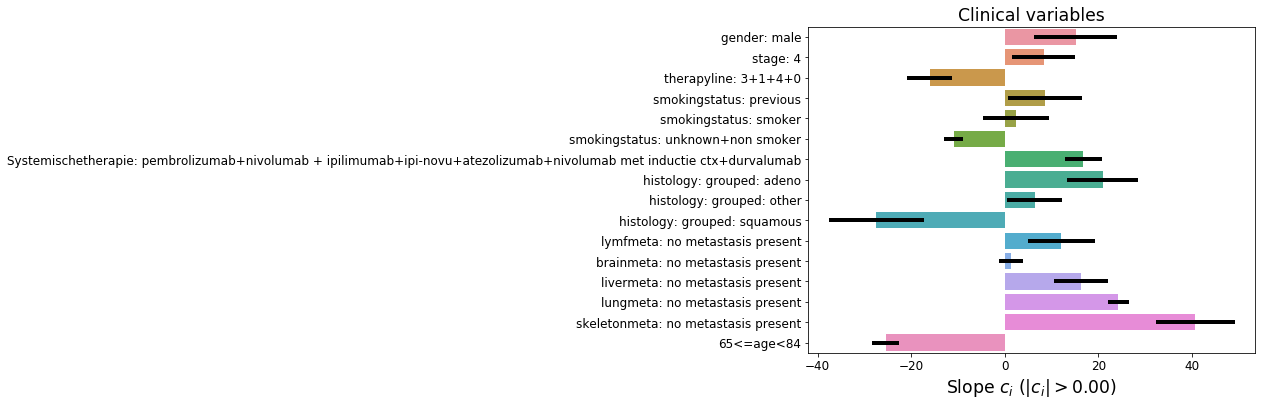

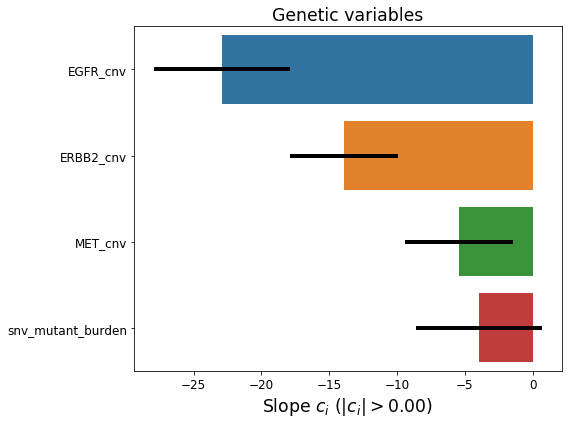

In [12]:
figure_names_os = (
    "elastic_regression_burden_clinical_os",
    "elastic_regression_burden_genetic_os",
)
view_linear_model_freeman(
    X_train_hm,
    y_train_hm["OS_days"],
    elastic_Freeman_mb,
    filenames=figure_names_os,
    thresshold=coefficient_cut_off,
)

# Conclusion
Summing all the contributions from the point mutations hardly acts as a stronger predictor.